In [ ]:
# Define your 3D Unit (I converted my standard 2D Unet to 3D)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want

![Screenshot 2025-06-11 at 17.11.38.jpg](<attachment:Screenshot 2025-06-11 at 17.11.38.jpg>)
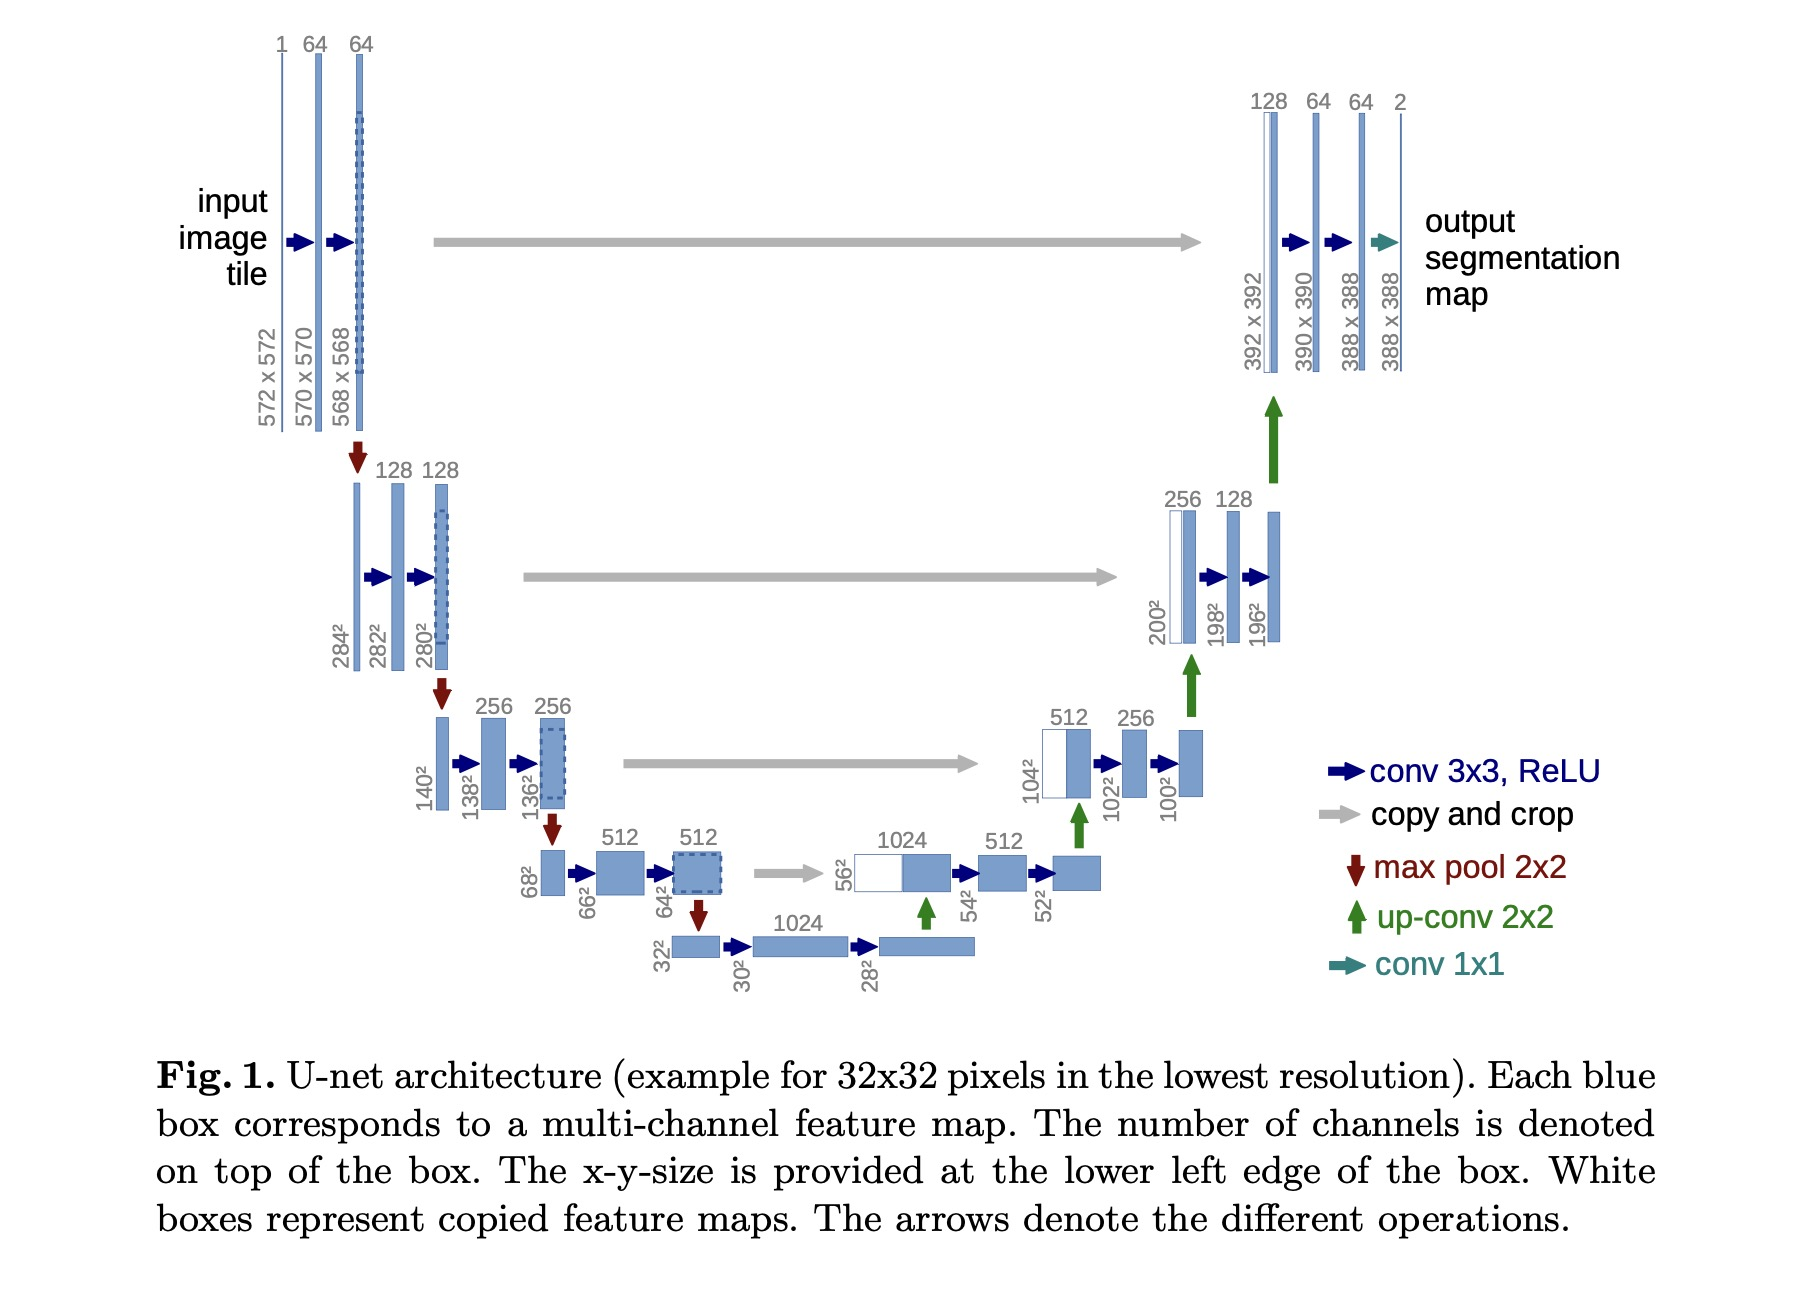

https://www.geeksforgeeks.org/u-net-architecture-explained/

In [ ]:
def transfer_learning_3d_unet(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes, pretrained_encoder='resnet3d'):
    """
    3D U-Net implementation with transfer learning support
    """
    # Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    
    # ENCODER PART - Use pre-trained model
    if pretrained_encoder == 'resnet3d':
        from monai.networks.nets import ResNet
        
        # Create ResNet encoder and get intermediate features
        encoder = ResNet(
            dimensions=3,
            in_channels=IMG_CHANNELS,
            pretrained=True,
            conv1_t_stride=2,
            n_input_channels=IMG_CHANNELS
        )
        
        # Extract skip connection outputs
        skip_outputs = []
        x = inputs
        
        # Pass through ResNet layers and save intermediate outputs for skip connections
        for layer in encoder.children():
            x = layer(x)
            if isinstance(layer, nn.Conv3d):
                skip_outputs.append(x)
        
        # Last layer of encoder
        c5 = x
        
    elif pretrained_encoder == 'densenet3d':
        from monai.networks.nets import DenseNet121
        
        # Similar implementation for DenseNet
        # ...
        
    else:
        # Original U-Net encoder if no pre-trained model specified
        s = inputs
        # Standard contraction path 
        c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
        c1 = Dropout(0.1)(c1)
        # ... rest of original encoder code
    
    # DECODER PART (Keep original)
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, skip_outputs[3]])  # Connect to appropriate skip connection
    # ... rest of decoder remains the same as original
    
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [ ]:
# Sanity check
model = simple_unet_model(128, 128, 128, 3, 4)

print(model.input_shape)

In [ ]:
print(model.output_shape)